In [6]:
from synaptics import *
import matplotlib.pyplot as plt

In [15]:
res = .1
layer = IzhikevichLayer(size=2, preset='CH', resolution=res)
layer1 = IzhikevichLayer(size=2, preset='RS', resolution = res)
synapse = Synapse(layer, layer1, tau=30)

In [16]:
a = [0, 14]
b = [14, 0]
#a = [0,0,0,0,0,9,9,9,9,9]
#b = [9,9,9,9,9,0,0,0,0,0]
synapse.weights *= 0
synapse.weights += .5

In [17]:
w00 = []
w01 = []
w10 = []
w11 = []
v00 = []
v01 = []
v10 = []
v11 = []
layer.transmitter_impact = 100

for i in range(3, 4):
    if i%2 == 1:
        layer.apply_current(a)
        idx = 1
    else:
        layer.apply_current(b)
        idx = 0
    for i in range(int(550 / res)):
        synapse.forward()
        
        layer1.I[idx] += 5
        layer1.forward()
        synapse.STDP(learning_rate=.0001, assymetry=5)

        v00.append(layer.v[0])
        v01.append(layer.v[-1])
        v10.append(layer1.v[0])
        v11.append(layer1.v[1])
        w00.append(synapse.weights[0,0])
        w01.append(synapse.weights[0,1])
        w10.append(synapse.weights[-1,0])
        w11.append(synapse.weights[-1,1])

length = list(range(int(len(v00))))

[[0. 0.]
 [0. 0.]] 
 [[0. 0.]
 [0. 0.]] 

[[0. 0.]
 [0. 0.]] 
 [[0. 0.]
 [0. 0.]] 

[[0. 0.]
 [0. 0.]] 
 [[0.         0.        ]
 [0.         1.79693785]] 

[[0.         0.        ]
 [0.         0.98507488]] 
 [[0. 0.]
 [0. 0.]] 

[[0.         0.        ]
 [0.         0.90008743]] 
 [[0. 0.]
 [0. 0.]] 

[[0.         0.        ]
 [0.         0.81422852]] 
 [[0. 0.]
 [0. 0.]] 

[[0.         0.        ]
 [0.         0.72556641]] 
 [[0. 0.]
 [0. 0.]] 

[[0.         0.        ]
 [0.         0.63372428]] 
 [[0. 0.]
 [0. 0.]] 

[[0.         0.        ]
 [0.         0.52909207]] 
 [[0. 0.]
 [0. 0.]] 

[[0.         0.        ]
 [0.         0.08882761]] 
 [[0. 0.]
 [0. 0.]] 

[[0.         0.        ]
 [0.         0.08035439]] 
 [[0. 0.]
 [0. 0.]] 

[[0.         0.        ]
 [0.         0.07196435]] 
 [[0. 0.]
 [0. 0.]] 

[[0.         0.        ]
 [0.         0.06317096]] 
 [[0. 0.]
 [0. 0.]] 

[[0. 0.]
 [0. 0.]] 
 [[0.         0.        ]
 [0.         3.88797013]] 

[[0.         0.        ]
 [0

In [94]:
for i in range(10000):
    layer.dynamics()
    layer1.dynamics()

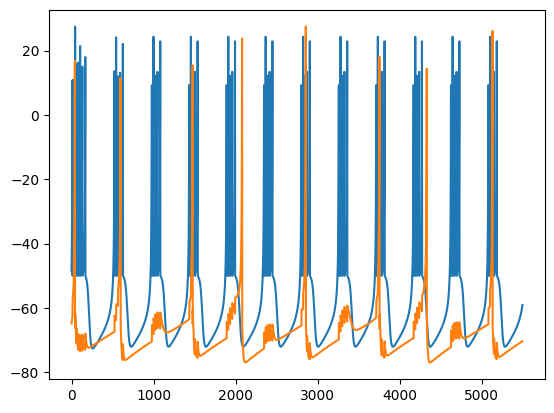

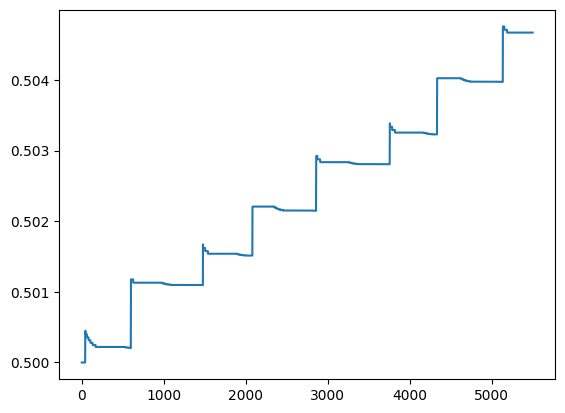

In [18]:
#plt.plot(v00)
plt.plot(length, v01)
#plt.plot(length, v10)
plt.plot(length, v11)
plt.show()
#plt.plot(length, w00)
#plt.plot(length, w01)
#plt.plot(length, w10)
plt.plot(length, w11)
plt.show()

[-70. -70.]
